# TRY IT OUT 8
## With the titanic dataset provided by seaborn, analyze the survival rate by cabin in the following order:

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import webbrowser
df =sns.load_dataset('titanic')

# save the titanic dataset to df and change the values according to the following conditions

#survival status (survived): changes the value to 'dead' and 1 to 'survived' Cabin (pclass): changes the value 1 to '1st class', 2 to '2nd class', and 3 to '3rd class'
df['survived'] = df['survived'].replace({0: 'dead', 1: 'survived'})
df['pclass'] = df['pclass'].replace({1: '1st class', 2: '2nd class', 3: '3rd class'})
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,dead,3rd class,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,survived,1st class,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,survived,3rd class,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,survived,1st class,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,dead,3rd class,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,dead,2nd class,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,survived,1st class,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,dead,3rd class,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,survived,1st class,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


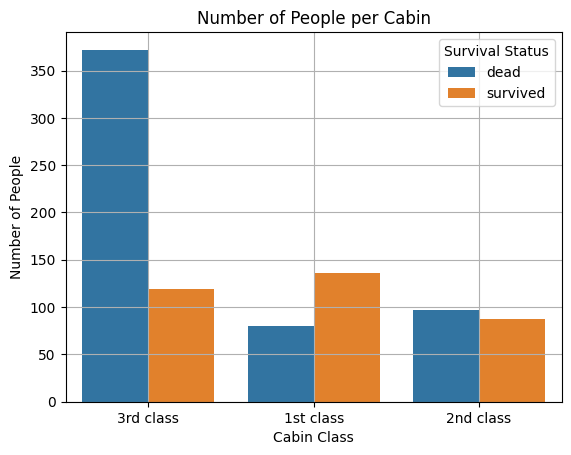

In [18]:
# display the number of people per cabin in bar graph. with each bar indication the number of dead and surviving people separately
sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Number of People per Cabin')
plt.xlabel('Cabin Class')
plt.ylabel('Number of People')
plt.legend(title='Survival Status')
plt.grid(True)
plt.show()

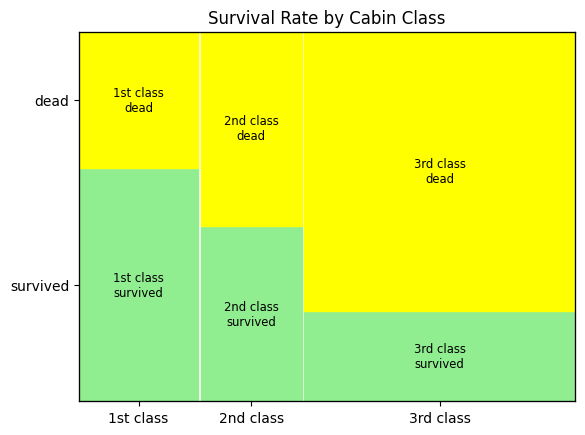

In [19]:
# represent the number of survivors by cabin as a mosaic plot, with cabin (pclass) on the x-axis and survival (survived) status on the y-axis

from statsmodels.graphics.mosaicplot import mosaic

props = lambda key : {'color': 'lightgreen' if 'survived' in key else 'yellow'}

mosaic(data=df.sort_values('pclass'),
       index=['pclass', 'survived'],
       properties=props,
       axes_label=True,
       title='Survival Rate by Cabin Class')
plt.show()

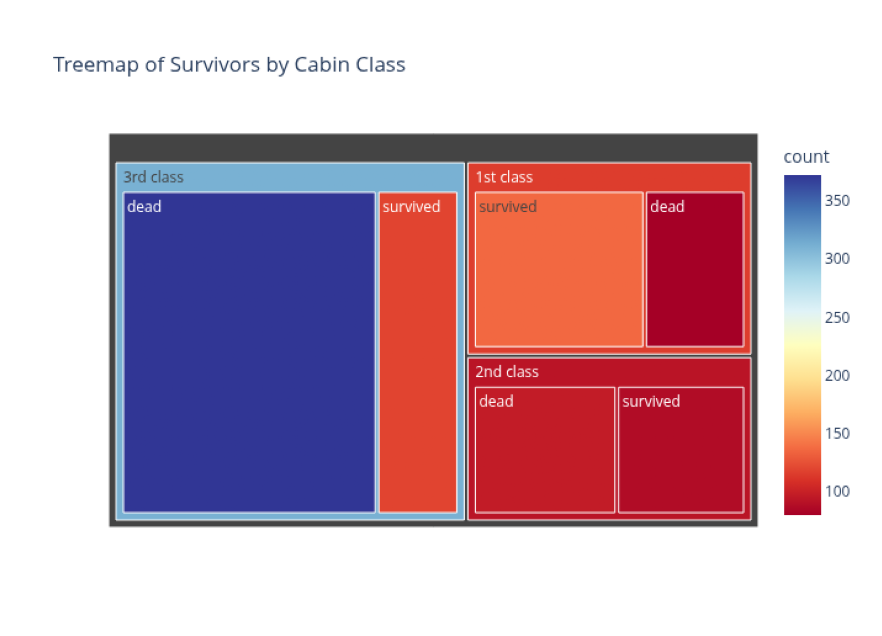

In [20]:
# show the treemap of survivors by cabin. However, create the graph sp that the survival tiles are included within the cabin tiles

import plotly.express as px
import matplotlib.image as mpimg

treemap_data = df.groupby(['pclass', 'survived']).size().reset_index(name='count')

fig = px.treemap(data_frame=treemap_data,
                 path=['pclass', 'survived'],
                 values='count',
                 color='count',
                 color_continuous_scale='RdYlBu',
                 title='Treemap of Survivors by Cabin Class')

fig.update_layout(width=800, height=600)

fig.write_image('../../data/titanic_treemap.png')
plt.figure(figsize=(12, 8))
plt.imshow(mpimg.imread('../../data/titanic_treemap.png'))
plt.axis('off')
plt.show()

In [22]:
fig.write_html('../../data/treemap.html')
webbrowser.open('../../data/treemap.html')

plt.show()